<a href="https://colab.research.google.com/github/Ntelhon/Weather_Temp_Prediction_ANN/blob/master/ANN_MT1v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
# import numpy as np # For numerical computations
# import matplotlib.pyplot as plt # For visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import keras
from keras import layers

In [4]:
# Load the dataset
data = pd.read_csv('train.csv')

In [5]:
print(data.head)

<bound method NDFrame.head of               dt                 date    temp  feels_like  pressure  humidity  \
0     1704067200  2024-01-01 00:00:00  285.04      284.43      1019        82   
1     1704070800  2024-01-01 01:00:00  284.32      283.76      1020        87   
2     1704074400  2024-01-01 02:00:00  284.32      283.76      1019        87   
3     1704078000  2024-01-01 03:00:00  284.32      283.63      1018        82   
4     1704081600  2024-01-01 04:00:00  284.23      283.53      1018        82   
...          ...                  ...     ...         ...       ...       ...   
7315  1730401200  2024-10-31 19:00:00  287.81      287.19      1024        71   
7316  1730404800  2024-10-31 20:00:00  286.74      286.14      1024        76   
7317  1730408400  2024-10-31 21:00:00  286.00      285.46      1024        81   
7318  1730412000  2024-10-31 22:00:00  286.00      285.35      1024        77   
7319  1730415600  2024-10-31 23:00:00  286.00      285.35      1024        77  

In [6]:
data = data.dropna()

data["T1"] = data["temp"]
data["T1"] = data["T1"].shift(periods=-1)
data["delta_temp"] = data["T1"]-data["temp"]
data = data.drop(["T1"], axis=1)

X = data[['temp', 'pressure', 'humidity', 'wind_speed']]  # Input features
y = data['temp']  # Target variable (average temperature)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Build the neural network model
model = keras.Sequential()
model.add(layers.Dense(8, input_dim=4, activation='relu'))  # Adjust number of neurons if needed
model.add(layers.Dense(4, activation='relu'))
# model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='linear')) # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
165/165 - 5s - 28ms/step - loss: 84174.3672 - val_loss: 83302.6016
Epoch 2/50
165/165 - 0s - 2ms/step - loss: 81012.6172 - val_loss: 77997.7969
Epoch 3/50
165/165 - 1s - 4ms/step - loss: 72953.4609 - val_loss: 66795.3750
Epoch 4/50
165/165 - 0s - 2ms/step - loss: 58622.3359 - val_loss: 49693.4062
Epoch 5/50
165/165 - 1s - 4ms/step - loss: 40455.1094 - val_loss: 31507.5352
Epoch 6/50
165/165 - 1s - 4ms/step - loss: 24059.3926 - val_loss: 17700.0137
Epoch 7/50
165/165 - 0s - 2ms/step - loss: 13150.3223 - val_loss: 9680.7783
Epoch 8/50
165/165 - 1s - 4ms/step - loss: 7307.3950 - val_loss: 5716.1387
Epoch 9/50
165/165 - 0s - 2ms/step - loss: 4554.6548 - val_loss: 3881.2632
Epoch 10/50
165/165 - 1s - 4ms/step - loss: 3257.4114 - val_loss: 2922.8630
Epoch 11/50
165/165 - 0s - 2ms/step - loss: 2506.7271 - val_loss: 2326.7126
Epoch 12/50
165/165 - 0s - 2ms/step - loss: 2010.3254 - val_loss: 1894.4890
Epoch 13/50
165/165 - 1s - 4ms/step - loss: 1630.3768 - val_loss: 1543.5057
Epoch 1

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error on Test Set: 0.8902543575521886


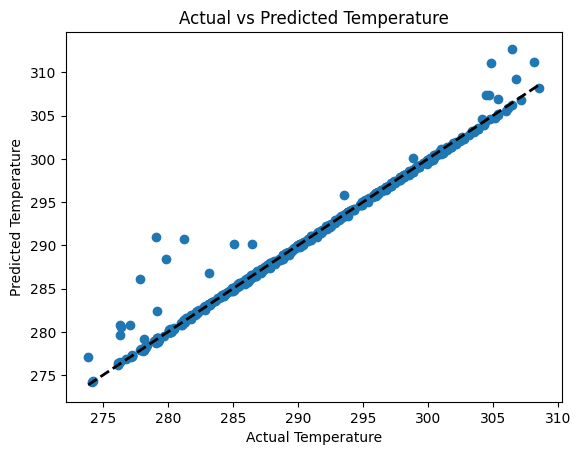

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

import matplotlib.pyplot as plt
# plot the results
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [11]:
# Save the model
model.save('temperature_model.h5')
model.save('temperature_model.keras')
